NameError: name 'set_zlim3d' is not defined

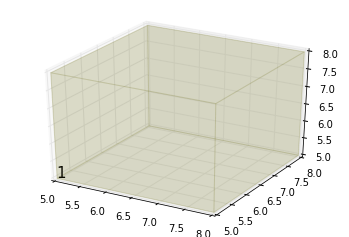

In [24]:
from mpl_toolkits.mplot3d import Axes3D
def plot_cube(ax, x, y, z, inc, a, i):
    "x y z location and alpha"
    ax.plot_surface([[x, x + inc], [x, x + inc]], [[y, y], [y + inc, y + inc]], z, alpha=a,facecolors='y')
    ax.plot_surface([[x, x + inc], [x, x + inc]], [[y, y], [y + inc, y + inc]], z + inc, alpha=a,facecolors='y')

    ax.plot_surface(x, [[y, y], [y + inc, y + inc]], [[z, z + inc], [z, z + inc]], alpha=a,facecolors='y')
    ax.plot_surface(x + inc, [[y, y], [y + inc, y + inc]], [[z, z + inc], [z, z + inc]], alpha=a,facecolors='y')

    ax.plot_surface([[x, x], [x + inc, x + inc]], y, [[z, z + inc], [z, z + inc]], alpha=a,facecolors='y')
    ax.plot_surface([[x, x], [x + inc, x + inc]], y + inc, [[z, z + inc], [z, z + inc]], alpha=a,facecolors='y')
    
    ax.text(x, y, z, i, fontsize=15)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# im = ax.scatter([x], y, z, c=t, marker='o', s=10, alpha=0.2)    
plot_cube(ax, 5, 5, 5, 3, 0.1, 1)
set_zlim3d(1,10)

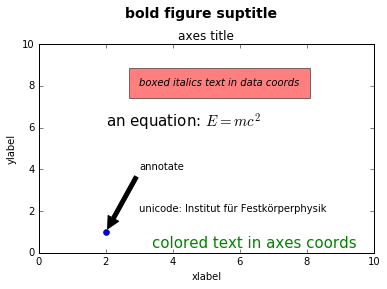

In [15]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, u'unicode: Institut f\374r Festk\366rperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

In [10]:
# generator version
def fibon(n):
    a = b = 1
    for i in xrange(n):
        yield a
        a, b = b, a + b

for x in fibon(10):
    print x,

1 1 2 3 5 8 13 21 34 55


In [15]:
''' generator, ref: http://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do'''

filter_sizes = [1,2]
feature_maps = [3,4]
conv_parameters = zip(filter_sizes, feature_maps)
c = (a+b for i, (a, b) in enumerate(conv_parameters))

In [16]:
list(c)

[4, 6]

In [72]:
'''class hierarchy, super'''
class A(object):
    def __init__(self,**kwargs):
        print("A.__init__()")
#         print(kwargs['c'])

class B(A):
    def __init__(self,**kwargs):
        print("B.__init__()")
        for name, value in kwargs.items():
            print(value)
        super(B, self).__init__(**kwargs)

class C(A):
    def __init__(self,**kwargs):
        print("C.__init__()")
        for name, value in kwargs.items():
            print(value)
        super(C,self).__init__(**kwargs)
        
class D(B,C):
    def __init__(self,a,**kwargs):
        print("init D")
        super(D,self).__init__(**kwargs)
d = D(a=0,b=1,c=2)

init D
B.__init__()
C.__init__()
A.__init__()


In [80]:
'''decorator'''
def entryExit(f):
    def new_f():
        print "Entering", f.__name__
        f()
        print "Exited", f.__name__
    return new_f

@entryExit
def func1():
    print "inside func1()"

@entryExit
def func2():
    print "inside func2()"
func1()
func2.__name__

Entering func1
inside func1()
Exited func1


'new_f'

In [130]:
'''decorator inside a class for class method'''
class Test(object):
    def _decorator(foo):
        def magic( self ) :
            print "start magic"
            foo( self )
            print "end magic"
        return magic

    @_decorator
    def bar( self ) :
        print "normal call"

test = Test()

test.bar()

start magic
normal call
end magic


In [129]:
'''decorator outside class'''
class MyDec(object):
    def __init__(self,flag):
        self.flag = flag
    def __call__(self, original_func):
        decorator_self = self
        def wrappee( *args, **kwargs):
            print 'in decorator before wrapee with flag ',decorator_self.flag
            original_func(*args,**kwargs)
            print 'in decorator after wrapee with flag ',decorator_self.flag
        return wrappee

@MyDec('foo de fa fa')
def bar(a,b,c):
    print 'in bar',a,b,c
bar('x','y','z')

in decorator before wrapee with flag  foo de fa fa
in bar x y z
in decorator after wrapee with flag  foo de fa fa


In [132]:
'''decorator inside a class for a function'''
def p_decorate(func):
    def func_wrapper(self):
        return "<p>{0}</p>".format(func(self))
    return func_wrapper

class Person(object):
    def __init__(self):
        self.name = "John"
        self.family = "Doe"

    @p_decorate
    def get_fullname(self):
        return self.name+" "+self.family

my_person = Person()
print my_person.get_fullname()

<p>John Doe</p>


In [183]:
'''conv3d in theano and cudnn'''

%reset
import theano
import theano.tensor as T
from theano.sandbox.cuda.dnn import dnn_conv, dnn_conv3d
from theano.tensor.nnet import conv2d
import numpy as np

theano.config.floatX = 'float32'
floatX = theano.config.floatX

print(theano.config.floatX)

conv_dim = 2
if conv_dim==2:
    dtensor4 = T.TensorType(floatX, (False,)*4)
    img = dtensor4(name='input')
    kerns = dtensor4(name='weight')
    base = dnn_conv(img = img, kerns = kerns, border_mode = 'valid', conv_mode = 'conv')        
#     conved = base.sum(1)
    conved = base
    myconv2d = theano.function([img,kerns], conved)
    
    a = np.zeros((4,3,5,5), dtype=floatX)
    a[0,0,:,:] = np.ones((5,5), dtype=floatX)
    a[1,1,:,:] = 3*np.ones((5,5), dtype=floatX)
    b = np.zeros((2,3,3,3), dtype=floatX)
    b[0,0,:,:] = 2*np.ones((3,3), dtype=floatX)
    b[1,1,:,:] = 4*np.ones((3,3), dtype=floatX)

    c = np.asarray(myconv2d(a,b))
    print(c.shape)
    print(c)
    
else:        
    dtensor5 = T.TensorType(floatX, (False,)*5)
    img = dtensor5(name='input')
    kerns = dtensor5(name='weight')
#     dtensor4 = T.TensorType(floatX, (False,)*4)
#     subsample = dtensor4(name='weight')
    base = dnn_conv3d(img = img, kerns = kerns, border_mode = 'valid', conv_mode = 'conv')     
#     conved = base.sum(1)
    conved = base
    conv3d = theano.function([img,kerns], conved)

    a = np.zeros((4,3,5,5,5), dtype=floatX)
    b = np.zeros((4,3,3,3,3), dtype=floatX) # # of channel in next layer, # of channel this layer, volume size
    print(a.dtype)
    print('input size',a.shape)
    print('filter size',b.shape)
    c = np.asarray(conv3d(a,b))
    print('output size',c.shape)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
float32
(4, 2, 3, 3)
[[[[  18.   18.   18.]
   [  18.   18.   18.]
   [  18.   18.   18.]]

  [[   0.    0.    0.]
   [   0.    0.    0.]
   [   0.    0.    0.]]]


 [[[   0.    0.    0.]
   [   0.    0.    0.]
   [   0.    0.    0.]]

  [[ 108.  108.  108.]
   [ 108.  108.  108.]
   [ 108.  108.  108.]]]


 [[[   0.    0.    0.]
   [   0.    0.    0.]
   [   0.    0.    0.]]

  [[   0.    0.    0.]
   [   0.    0.    0.]
   [   0.    0.    0.]]]


 [[[   0.    0.    0.]
   [   0.    0.    0.]
   [   0.    0.    0.]]

  [[   0.    0.    0.]
   [   0.    0.    0.]
   [   0.    0.    0.]]]]


In [29]:
'''2d cnn layer in blocks'''
%reset
import numpy as np
import theano
from theano import tensor
from blocks.bricks.base import Brick
from blocks.bricks.conv import (Convolutional, ConvolutionalSequence,Flattener, MaxPooling)
from toolz.itertoolz import interleave
from blocks.initialization import Constant, Uniform, IsotropicGaussian
from blocks.bricks import MLP, Tanh, Softmax
theano.config.floatX = 'float32'
floatX = theano.config.floatX

convnet = Convolutional(
                    filter_size=(3,3),
                    num_filters=2,
                    num_channels=3,
                    step=(1,1),
                    border_mode='valid',
                    weights_init = Constant(0),
                    biases_init=Constant(0),
                    name='conv_0')
convnet.initialize()
x = tensor.tensor4('features')
h = convnet.apply(x)
f = theano.function([x], h)

a = np.zeros((4,3,5,5), dtype=floatX)
a[0,0,:,:] = np.ones((5,5), dtype=floatX)
a[1,1,:,:] = 3*np.ones((5,5), dtype=floatX)
# b = np.zeros((4,3,3,3), dtype=floatX)
# b[0,0,:,:] = 2*np.ones((3,3), dtype=floatX)
# b[1,1,:,:] = 4*np.ones((3,3), dtype=floatX)
c = f(a)
print(c.shape)
print(c)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
(4, 2, 3, 3)
[[[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]


 [[[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]

  [[ 0.  0.  0.]
   [ 0.  0.  0.]
   [ 0.  0.  0.]]]]


In [65]:
% reset
'''native 3d cnn brick in blocks'''
import numpy as np
from blocks.bricks.base import application, lazy
from blocks.bricks import Brick
from blocks.bricks import Feedforward, Initializable
from theano.sandbox.cuda.dnn import dnn_conv, dnn_conv3d
from theano.tensor.nnet import conv2d
import theano
import theano.tensor as T
theano.config.floatX = 'float32'
floatX = theano.config.floatX

class Conv3d(Feedforward,Initializable):
#     def __init__(**args):
#         kerns
    @application(inputs=['input1', 'input2'], outputs=['output'])
    def apply(self, input1, input2):
        base = dnn_conv3d(img = input1, kerns = input2, border_mode = 'valid', conv_mode = 'conv')     
        conved = base
        return conved
conv3d = Conv3d()
conv3d.initialize()

# symbolic graph
dtensor5 = T.TensorType(floatX, (False,)*5)
img = dtensor5(name='input')
kerns = dtensor5(name='weight')
h = conv3d.apply(img,kerns)
f = theano.function([img,kerns], h)

# assign number
a = np.zeros((2,3,5,5,5), dtype=floatX)
b = np.zeros((2,3,3,3,3), dtype=floatX) # # of channel in next layer, # of channel this layer, volume size
a[0,0,:,:,:] = np.ones((5,5), dtype=floatX)
a[1,1,:,:,:] = 3*np.ones((5,5,5), dtype=floatX)
b[0,0,:,:,:] = 2*np.ones((3,3,3), dtype=floatX)
b[1,1,:,:,:] = 4*np.ones((3,3,3), dtype=floatX)
print(a.dtype)
print('input size',a.shape)
print('filter size',b.shape)
c = conv3d.apply(a,b)
print(c.eval())

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
float32
input size (2, 3, 5, 5, 5)
filter size (2, 3, 3, 3, 3)
[[[[[  54.   54.   54.]
    [  54.   54.   54.]
    [  54.   54.   54.]]

   [[  54.   54.   54.]
    [  54.   54.   54.]
    [  54.   54.   54.]]

   [[  54.   54.   54.]
    [  54.   54.   54.]
    [  54.   54.   54.]]]


  [[[   0.    0.    0.]
    [   0.    0.    0.]
    [   0.    0.    0.]]

   [[   0.    0.    0.]
    [   0.    0.    0.]
    [   0.    0.    0.]]

   [[   0.    0.    0.]
    [   0.    0.    0.]
    [   0.    0.    0.]]]]



 [[[[   0.    0.    0.]
    [   0.    0.    0.]
    [   0.    0.    0.]]

   [[   0.    0.    0.]
    [   0.    0.    0.]
    [   0.    0.    0.]]

   [[   0.    0.    0.]
    [   0.    0.    0.]
    [   0.    0.    0.]]]


  [[[ 324.  324.  324.]
    [ 324.  324.  324.]
    [ 324.  324.  324.]]

   [[ 324.  324.  324.]
    [ 324.  324.  324.]
    [ 324.  324.  324.]]

   [[ 324.  324.  324.]
    [ 324.  324.  324.]
   

In [14]:
% reset
from blocks.bricks.base import application, lazy
from blocks.bricks import Feedforward, Linear
from blocks.initialization import Constant, Uniform, IsotropicGaussian

class ChainOfTwoFeedforward(Feedforward):
    '''Two sequential Feedforward bricks'''
    def __init__(self, brick1, brick2, **kwargs):
        self.brick1 = brick1
        self.brick2 = brick2
        children = [self.brick1, self.brick2]
        kwargs.setdefault('children', []).extend(children)
        super(Feedforward, self).__init__(**kwargs)

    @property
    def input_dim(self):
        return self.brick1.input_dim

    @input_dim.setter
    def input_dim(self, value):
        self.brick1.input_dim = value

    @property
    def output_dim(self):
        return self.brick2.output_dim

    @output_dim.setter
    def output_dim(self, value):
        self.brick2.output_dim = value

    def _push_allocation_config(self):
        self.brick2.input_dim = self.brick1.get_dim('output')

    @application
    def apply(self, x):
        return self.brick2.apply(self.brick1.apply(x))
    
brick1 = Linear(input_dim=3, output_dim=2, use_bias=False,weights_init=Constant(2))
brick2 = Linear(output_dim=4, use_bias=False, weights_init=Constant(2))
seq = ChainOfTwoFeedforward(brick1, brick2)
seq.initialize()
brick2.input_dim

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


2

In [18]:
%reset
from blocks.bricks.sequences import MLP
from blocks.bricks import Initializable, Tanh, Softmax, Identity
from blocks.initialization import IsotropicGaussian, Constant

# mlp = MLP(activations=[Tanh(), Softmax()], dims=[784, 100, 10],weights_init=IsotropicGaussian(0.01), biases_init=Constant(0))
# mlp.initialize()
# x = tensor.matrix('features')
# y = tensor.lmatrix('targets')
# y_hat = mlp.apply(x)

import theano.tensor as tensor
from blocks.bricks import Rectifier
dim_att = 5
n0 = 3
l = tensor.matrix('l') # for a batch
inits = {
    'weights_init': IsotropicGaussian(0.01),
    'biases_init': Constant(0.),
}
# rho = tensor.lmatrix('targets')
x = tensor.matrix('features')  # keyword from fuel
from attention_module.attention import ZoomableAttentionWindow
zoomer = ZoomableAttentionWindow(1, 28, 28, 5)
rho = zoomer.read_large(x, l[1], l[0]) # glimpse sensor in 2D
linear0 = MLP(activations=[Identity()], dims=[dim_att*dim_att, n0], name="glimpse network 0", **inits)
rect0 = Rectifier()
h_g = rect0.apply(linear0.apply(rho))  # theta_g^1

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
(Shape.0, Shape.0)
(Shape.0, Shape.0)
(Shape.0, Shape.0)
(Shape.0, Shape.0)


In [99]:
'''simple RNN in blocks'''
import numpy
import theano
from theano import tensor
from blocks import initialization
from blocks.bricks import Identity
from blocks.bricks.recurrent import SimpleRecurrent

x = tensor.tensor3('x')
rnn = SimpleRecurrent(dim=4, activation=Identity(), weights_init=initialization.Identity())
rnn.initialize()
h = rnn.apply(x)
f = theano.function([x], h)
print(f(numpy.ones((5, 2, 4), dtype=theano.config.floatX)))

[[[ 1.  1.  1.  1.]
  [ 1.  1.  1.  1.]]

 [[ 2.  2.  2.  2.]
  [ 2.  2.  2.  2.]]

 [[ 3.  3.  3.  3.]
  [ 3.  3.  3.  3.]]

 [[ 4.  4.  4.  4.]
  [ 4.  4.  4.  4.]]

 [[ 5.  5.  5.  5.]
  [ 5.  5.  5.  5.]]]


In [8]:
'''two layer rnn in blocks'''
import numpy
import theano
from theano import tensor
from blocks.bricks import Identity
from blocks import initialization
from blocks.bricks.recurrent import BaseRecurrent, recurrent
from blocks.bricks.recurrent import SimpleRecurrent
class FeedbackRNN(BaseRecurrent):
    def __init__(self, dim, **kwargs):
        super(FeedbackRNN, self).__init__(**kwargs)
        self.dim = dim
        self.first_recurrent_layer = SimpleRecurrent(dim=self.dim, activation=Identity(), name='first_recurrent_layer',weights_init=initialization.Identity())
        self.second_recurrent_layer = SimpleRecurrent(dim=self.dim, activation=Identity(), name='second_recurrent_layer',weights_init=initialization.Identity())
        self.children = [self.first_recurrent_layer,self.second_recurrent_layer]

    @recurrent(sequences=['inputs'], contexts=[],states=['first_states', 'second_states'],outputs=['first_states', 'second_states'])
    def apply(self, inputs, first_states=None, second_states=None):
        first_h = self.first_recurrent_layer.apply(inputs=inputs, states=first_states + second_states, iterate=False)
        second_h = self.second_recurrent_layer.apply(inputs=first_h, states=second_states, iterate=False)
        return first_h, second_h

    def get_dim(self, name):
        return (self.dim if name in ('inputs', 'first_states', 'second_states')
        else super(FeedbackRNN, self).get_dim(name))

x = tensor.tensor3('x')
feedback = FeedbackRNN(dim=3)
feedback.initialize()
first_h, second_h = feedback.apply(inputs=x)
f = theano.function([x], [first_h, second_h])
for states in f(numpy.ones((4, 2, 3), dtype=theano.config.floatX)):
    print(states)

[[[  1.   1.   1.]
  [  1.   1.   1.]]

 [[  3.   3.   3.]
  [  3.   3.   3.]]

 [[  8.   8.   8.]
  [  8.   8.   8.]]

 [[ 21.  21.  21.]
  [ 21.  21.  21.]]]
[[[  1.   1.   1.]
  [  1.   1.   1.]]

 [[  4.   4.   4.]
  [  4.   4.   4.]]

 [[ 12.  12.  12.]
  [ 12.  12.  12.]]

 [[ 33.  33.  33.]
  [ 33.  33.  33.]]]


In [ ]:
'''simple customized rnn in blocks to test output'''
import numpy
import theano
from theano import tensor
from blocks.bricks import Identity
from blocks import initialization
from blocks.bricks.recurrent import BaseRecurrent, recurrent
from blocks.bricks.recurrent import SimpleRecurrent
class FeedbackRNN(BaseRecurrent):
    def __init__(self, dim, **kwargs):
        super(FeedbackRNN, self).__init__(**kwargs)
        self.dim = dim
        self.first_recurrent_layer = SimpleRecurrent(dim=self.dim, activation=Identity(), name='first_recurrent_layer',weights_init=initialization.Identity())
        self.second_recurrent_layer = SimpleRecurrent(dim=self.dim, activation=Identity(), name='second_recurrent_layer',weights_init=initialization.Identity())
        self.children = [self.first_recurrent_layer,self.second_recurrent_layer]

    @recurrent(sequences=['inputs'], contexts=[],states=['first_states', 'second_states'],outputs=['first_states', 'second_states'])
    def apply(self, inputs, first_states=None, second_states=None):
        first_states = inputs
        return first_h, second_h

    def get_dim(self, name):
        return (self.dim if name in ('inputs', 'first_states', 'second_states')
        else super(FeedbackRNN, self).get_dim(name))

x = tensor.tensor3('x')
feedback = FeedbackRNN(dim=3)
feedback.initialize()
first_h, second_h = feedback.apply(inputs=x)
f = theano.function([x], [first_h, second_h])
for states in f(numpy.ones((4, 2, 3), dtype=theano.config.floatX)):
    print(states)

In [203]:
states.ndim

3

In [10]:
'''save data to hdf5 format, from Max'''

import numpy as np
import h5py
import tarfile, os
import sys
import cStringIO as StringIO
import tarfile
import time
import zlib

PREFIX = 'data/'
SUFFIX = '.npy.z'

class NpyTarReader(object):
    def __init__(self, fname):
        self.tfile = tarfile.open(fname, 'r|')

    def __iter__(self):
        return self

    def __next__(self):
        return self.next()

    def next(self):
        entry = self.tfile.next()
        if entry is None:
            raise StopIteration()
        name = entry.name[len(PREFIX):-len(SUFFIX)]
        fileobj = self.tfile.extractfile(entry)
        buf = zlib.decompress(fileobj.read())
        arr = np.load(StringIO.StringIO(buf))
        return arr, name

    def close(self):
        self.tfile.close()

train_dataset = NpyTarReader('/home/hope-yao/Documents/Data/ModelNet10/shapenet10_train.tar')
test_dataset = NpyTarReader('/home/hope-yao/Documents/Data/ModelNet10/shapenet10_test.tar')

train_features = []
train_targets = []
test_features = []
test_targets = []
for index, (array, name) in enumerate(train_dataset):
    if int(name[-3:])==1:
#         train_features.append(array.flatten())
        train_features.append(array.reshape(1,array.shape[0],array.shape[1],array.shape[2]))
        train_targets.append([int(name[0:3])])
for index, (array, name) in enumerate(test_dataset):
    if int(name[-3:]) == 1:
#         test_features.append(array.flatten())
        test_features.append(array.reshape(1,array.shape[0],array.shape[1],array.shape[2]))
        test_targets.append([int(name[0:3])])

train_features = np.array(train_features)
train_targets = np.array(train_targets)-1 #starts from 0
test_features = np.array(test_features)
test_targets = np.array(test_targets)-1
train_n, c, p1, p2, p3 = train_features.shape
test_n = test_features.shape[0]
n = train_n + test_n

f = h5py.File('potcup_sal.hdf5', mode='w')
features = f.create_dataset('input', (n, c, p1, p2, p3), dtype='uint8')
targets = f.create_dataset('targets', (n, 1), dtype='uint8')

features[...] = np.vstack([train_features, test_features])
targets[...] = np.vstack([train_targets, test_targets])

features.dims[0].label = 'batch'
features.dims[1].label = 'input'
targets.dims[0].label = 'batch'
targets.dims[1].label = 'index'

from fuel.datasets.hdf5 import H5PYDataset
split_dict = {
    'train': {'input': (0, train_n), 'targets': (0, train_n)},
    'test': {'input': (train_n, n), 'targets': (train_n, n)}}
f.attrs['split'] = H5PYDataset.create_split_array(split_dict)

f.flush()
f.close()

In [3]:
train_targets.shape

(18, 1)

In [11]:
'''loading fuel dataset'''
% reset
from fuel.datasets.hdf5 import H5PYDataset
mnist_train = H5PYDataset('/home/hope-yao/Documents/Data/bmnist.hdf5', which_sets=('train',))
mnist_test = H5PYDataset('/home/hope-yao/Documents/Data/bmnist.hdf5', which_sets=('test',))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
print(mnist_train.provides_sources)
handle = mnist_train.open()
train_data = mnist_train.get_data(handle, slice(10, 60000))
handletest = mnist_test.open()
test_data = mnist_test.get_data(handletest, slice(10, 10000))

print((train_data[1].shape))
train_features = train_data[0]
train_targets = train_data[1]
print((test_data[0].shape))
test_features = test_data[0]
test_targets = test_data[1]

(u'features', u'targets')
(59990, 1)
(9990, 1, 28, 28)


In [93]:
import numpy as np
import h5py
import tarfile, os
import sys
import cStringIO as StringIO
import tarfile
import time
import zlib
n = 70000
c = 1
p1 = p2 = 28
train_n = 60000
test_n = 10000

f = h5py.File('bmnist.hdf5', mode='w')
features = f.create_dataset('features', (n, c, p1, p2), dtype='uint8')
targets = f.create_dataset('targets', (n, 1), dtype='uint8')

train_features = train_features/128
test_features = test_features/128

features[...] = np.vstack([train_features, test_features])
targets[...] = np.vstack([train_targets, test_targets])

features.dims[0].label = 'batch'
features.dims[1].label = 'input'
targets.dims[0].label = 'batch'
targets.dims[1].label = 'index'

from fuel.datasets.hdf5 import H5PYDataset
split_dict = {
    'train': {'features': (0, train_n), 'targets': (0, train_n)},
    'test': {'features': (train_n, n), 'targets': (train_n, n)}}
f.attrs['split'] = H5PYDataset.create_split_array(split_dict)

f.flush()
f.close()

In [7]:
from fuel.streams import DataStream
from fuel.schemes import ShuffledScheme
batch_size = 100
train_set_stream = DataStream.default_stream(
    train_set, iteration_scheme=ShuffledScheme(
        train_set.num_examples, batch_size))

In [39]:
import theano.tensor as tensor
A = tensor.zeros((3200, 3, 32, 1))
B = tensor.zeros((3200))
print(A.broadcastable,B.broadcastable)
# B = B.transpose([0, 2, 1])
# A.dimshuffle([0,1,2,'x']) * B.dimshuffle([0,'x',1,2])     
C=(A*B).eval()
C.shape

((False, False, False, True), (False,))


(3200, 3, 32, 3200)

In [192]:
'''upsample in post-process'''
import numpy as np
import scipy.ndimage as ndimage
inarr = np.ones((32,32,32))
def upsample(X,d):
    XX = np.zeros((X.shape[0],X.shape[1],d*X.shape[2],d*X.shape[3],d*X.shape[4]))
    for i,xi in enumerate(X):
        for j,xij in enumerate(xi):
            tmp = (ndimage.zoom(xij, d))
            XX[i,j,:,:,:] = tmp
    return np.float32(XX)

In [193]:
'''project upper layer filter back to the input layer'''
from theano.sandbox.cuda.dnn import dnn_conv3d
def deconv(W0,W1):
    print(W0.shape)
    print(W1.shape)
    filter_size = W0.shape[2:5]
    num_filter = W0.shape[0]
    num_ch = W1.shape[0]
    W1_layer0 = dnn_conv3d(img=W1,kerns=W0.transpose(1,0,2,3,4),border_mode='valid',subsample=(1,1,1))
    W1_layer0 = np.asarray(W1_layer0.eval())
    print(W1_layer0.shape)
    return W1_layer0

In [102]:
a = (1,2,3)
len(a)

3

In [9]:
'''visualize 3D data'''
def plot_cube(ax,x,y,z,a):
    "x y z location and alpha"
    inc = 1
    ax.plot_surface([[x,x+inc],[x,x+inc]],[[y,y],[y+inc,y+inc]],z, alpha=a)
    ax.plot_surface([[x,x+inc],[x,x+inc]],[[y,y],[y+inc,y+inc]],z+inc, alpha=a)

    ax.plot_surface(x,[[y,y],[y+inc,y+inc]],[[z,z+inc],[z,z+inc]], alpha=a)
    ax.plot_surface(x+inc,[[y,y],[y+inc,y+inc]],[[z,z+inc],[z,z+inc]], alpha=a)
`
    ax.plot_surface([[x,x],[x+inc,x+inc]],y,[[z,z+inc],[z,z+inc]], alpha=a)
    ax.plot_surface([[x,x],[x+inc,x+inc]],y+inc,[[z,z+inc],[z,z+inc]], alpha=a)

In [ ]:
'''filter visualization'''
def viz1(V):
    V = V/np.max(V) * 0.3 
    V[V<0]=0
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            for k in range(V.shape[2]):
                if V[i,j,k]!=0:
                    plot_cube(ax,i,j,k,V[i,j,k])
    plt.show()

In [6]:
'''much faster filter visualization'''
# % reset
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def viz2(V):
    V = V/np.max(V) * 0.3 
    V[V<0]=0
    
    x=y=z=t=[]
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            for k in range(V.shape[2]):
                if V[i,j,k]!=0:
                    x = x + [i]
                    y = y + [j]
                    z = z + [k]
                    t = t + [V[i,j,k]]
    x = np.asarray(x)
    y = np.asarray(y)
    z = np.asarray(z)
    t = np.asarray(z)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    im = ax.scatter(x, y, z, c=t, marker='o', s=50)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.xlim(0,V.shape[0])
    plt.ylim(0,V.shape[1])
#     plt.zlim((0,V.shape[2]))
    cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
    fig.colorbar(im, cax=cax, orientation='horizontal')
    plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

fig = plt.figure(1, figsize=(5.5,5.5))

X, Y = meshgrid(x, y)
Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

title('Nonsense')
xlabel('x-stuff')
ylabel('y-stuff')

# the scatter plot:
axScatter = plt.subplot(111)
axScatter.scatter(x, y)

# set axes range
plt.xlim(-2, 2)
plt.ylim(-2, 2)

show()

In [182]:
from fuel.datasets.hdf5 import H5PYDataset
train_set = H5PYDataset('potcup_vox.hdf5', which_sets=('train',))
handle = train_set.open()
train_data = train_set.get_data(handle, slice(0, 18))
train_data[1].shape

(18, 1)

In [190]:
% reset
from fuel.schemes import (SequentialScheme, ShuffledScheme,
                   SequentialExampleScheme, ShuffledExampleScheme)
schemes = [SequentialScheme(examples=8, batch_size=4),
    ShuffledScheme(examples=9, batch_size=4),
    SequentialExampleScheme(examples=8),
    ShuffledExampleScheme(examples=8)]
for scheme in schemes:
    print(list(scheme.get_request_iterator()))

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
[[0, 1, 2, 3], [4, 5, 6, 7]]
[[8, 2, 6, 7], [1, 0, 4, 3], [5]]
[0, 1, 2, 3, 4, 5, 6, 7]
[7, 2, 1, 6, 0, 4, 3, 5]


In [195]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import tarfile
tarball = tarfile.open('3DLeNet.pkl', 'r')
ps = numpy.load(tarball.extractfile(tarball.getmember('_parameters')))
sorted(ps.keys())

W0 = ps['|lenet|convolutionalsequence3|conv_0.W']
W1 = ps['|lenet|convolutionalsequence3|conv_1.W']
W1 = upsample(W1, 2)

W1_layer0 = deconv(W0,W1)
# V = W1_layer0[10,0,:,:,:]
# viz2(V)

(16, 1, 5, 5, 5)
(24, 16, 10, 10, 10)
(24, 1, 6, 6, 6)


In [134]:
(parameters.keys())

['/mlp/linear_1.W', '/mlp/linear_1.b', '/mlp/linear_0.b', '/mlp/linear_0.W']

In [107]:
'''save and load blocks model'''
from theano import tensor
from blocks.main_loop import MainLoop
from blocks.bricks import MLP, Tanh, Softmax
from blocks.model import Model
mlp = MLP([Tanh(), None], [784, 10, 10])
x = tensor.matrix('features')
y = tensor.lmatrix('targets')
cost = Softmax().categorical_cross_entropy(
            y.flatten(), mlp.apply(tensor.flatten(x, outdim=2)))
main_loop = MainLoop(None, None, model=Model(cost))
from blocks.serialization import dump, load
import tarfile
with open('main_loop.tar', 'wb') as dst:
     dump(main_loop, dst)
tarball = tarfile.open('main_loop.tar', 'r')
tarball # doctest: +ELLIPSIS

In [108]:
tarball.getnames()

['_pkl']

In [109]:
tarball.close()

In [110]:
with open('main_loop.tar', 'wb') as dst:
     dump(main_loop, dst,
          parameters=main_loop.model.parameters)
tarball = tarfile.open('main_loop.tar', 'r')
tarball.getnames()

['_parameters', '_pkl']

In [112]:
import numpy
ps = numpy.load(tarball.extractfile(tarball.getmember('_parameters')))
sorted(ps.keys()) # doctest: +ELLIPSIS

['|mlp|linear_0.W', '|mlp|linear_0.b', '|mlp|linear_1.W', '|mlp|linear_1.b']

In [113]:
ps.close()
with open('main_loop.tar', 'rb') as src:
     main_loop_loaded = load(src)
main_loop_loaded # doctest: +ELLIPSIS

In [117]:
from blocks.serialization import load_parameters
with open('main_loop.tar', 'rb') as src:
     parameters = load_parameters(src)
sorted(parameters.keys()) # doctest: +ELLIPSIS

['/mlp/linear_0.W', '/mlp/linear_0.b', '/mlp/linear_1.W', '/mlp/linear_1.b']

In [175]:
'''Adaboost'''
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()
clf = AdaBoostClassifier(n_estimators=15)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.95996732026143794

In [26]:
'''blocks pickle and load'''
from theano import tensor
from blocks.bricks import MLP, Tanh
from blocks.model import Model

x = tensor.matrix('x')
mlp = MLP([Tanh(), Tanh()], [10, 10, 10])
y = mlp.apply(x)
model = Model(y)
model.get_top_bricks()[0]


<blocks.bricks.sequences.MLP object at 0x7f58442f42d0: name=mlp>